In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
software_data_2017 = pd.read_csv("/project/biocomplexity/sdad/projects_data/ncses/bi/BERT_Consolidated_Methods/DNA_Software_Articles_2017_no_rep.csv")
diggy_predictions=pd.read_csv('/project/class/bii_sdad_dspg/uva_2021/binn/100k_articles_index_innovation_classification_prediction_diggy.csv')

In [3]:
company_list=pd.read_csv('/project/biocomplexity/sdad/projects_data/ncses/bi/DNA Data 2021/companies.csv')
company_list.code = company_list.code.str.lower()
company_list = company_list.rename(columns = {'code':'dna_code'})
company_list.drop_duplicates('dna_code', inplace = True)

In [4]:
merged_labeled_software_2017 = diggy_predictions.merge(software_data_2017, left_on='an', right_on='an') ## Merging diggy preds for innov or no innov
software_companies_2017 = merged_labeled_software_2017['company_codes_about'].str.split(',', expand=True).stack().value_counts() ## getting value counts of all companies
software_companies_2017=software_companies_2017.to_frame() ## converting to frame for neat view

software_companies_2017.reset_index(inplace=True)
software_companies_2017 = software_companies_2017.rename(columns = {'index':'dna_code'})
software_companies_2017 = software_companies_2017.rename(columns = {0:'All Mentions'})

In [5]:
merged_labeled_software_yes = merged_labeled_software_2017[merged_labeled_software_2017['pred_y']==1] ## Yes innov pred subset from pred
software_companies_2017_yes = merged_labeled_software_yes['company_codes_about'].str.split(',', expand=True).stack().value_counts()
software_companies_2017_yes=software_companies_2017_yes.to_frame()

software_companies_2017_yes.reset_index(inplace=True)
software_companies_2017_yes = software_companies_2017_yes.rename(columns = {'index':'dna_code'})
software_companies_2017_yes = software_companies_2017_yes.rename(columns = {0:'Innovative Mentions'})

In [6]:
data = software_companies_2017[1:].merge(software_companies_2017_yes[1:], on = "dna_code", how = "left")
data = data.merge(company_list, on='dna_code', how = 'left')
#data['percent'] = round((data["Innovative Mentions"]/data["All Mentions"])*100,2)
#data

In [7]:
data.head(10)

,dna_code,All Mentions,Innovative Mentions,description,ticker,ticker_exchange,exchange
0,ibm,10185,588.0,International Business Machines Corp.,IBM28A,IBM28A:XNYS,XNYS
1,mcrost,5895,1887.0,Microsoft Corporation,MSFT33,MSFT33:XNYS,XNYS
2,fjfvpl,3473,673.0,Snap Inc,SNAP,SNAP:XNYS,XNYS
3,orcle,1906,448.0,Oracle Corporation,ORCL,ORCL:XSWX,XSWX
4,goog,1640,694.0,Alphabet Inc.,ABEA,ABEA:XETR,XETR
5,onlnfr,1169,472.0,"Facebook, Inc.",FB,FB:XSWX,XSWX
6,amzcom,1099,325.0,"Amazon.com, Inc.",AMZN,AMZN:XSGO,XSGO
7,salesf,1032,287.0,Salesforce.com Inc,0QYJ,0QYJ:XLON,XLON
8,applc,984,451.0,Apple Inc.,AAPLEUR,AAPLEUR:XSWX,XSWX
9,zxamaz,947,372.0,"Amazon Web Services, Inc.",NaN,NaN,NaN


In [12]:
total

10.0

In [30]:
totals = i for i not in 2i in totals[i] 

SyntaxError: invalid syntax (<ipython-input-30-33c13a718f2b>, line 1)

1
3
5
7
9
11
13
15
17
19


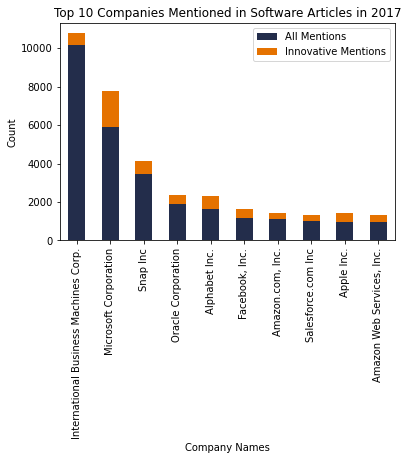

In [44]:
y = data.head(10).plot.bar(x=' description', rot=90, color = ['#232D4B', "#E57200"], stacked = True)
plt.title("Top 10 Companies Mentioned in Software Articles in 2017")
plt.xlabel('Company Names')
plt.ylabel('Count')

#fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.savefig(('/project/class/bii_sdad_dspg/uva_2021/binn/images/classification/2017_top_10_innovative_companies.png'), dpi = 600, bbox_inches='tight')
plt.show()

In [250]:
total_2017_companies = len(software_companies_2017[1:])
total_innovative_companies_classified = len(software_companies_2017_yes[1:])
total_companies_no_innovation = total_2017_companies - total_innovative_companies_classified

In [251]:
total_2017_companies

11536

In [252]:
total_innovative_companies_classified

3926

In [253]:
total_companies_no_innovation

7610

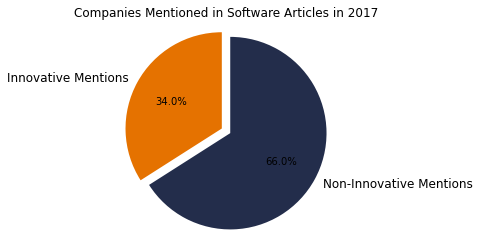

In [296]:
labels = ['Innovative Mentions', 'Non-Innovative Mentions']
sizes = [total_innovative_companies_classified, total_companies_no_innovation]
explode = (0.1, 0)
colors = ("#E57200", "#232D4B")
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, labels=labels, explode=explode, startangle=90, autopct='%1.1f%%', colors = colors, textprops={'fontsize': 14})
texts[0].set_fontsize(12)
texts[1].set_fontsize(12)
autotexts[0].set_fontsize(10)
autotexts[1].set_fontsize(10)
ax1.axis('equal')  
plt.title("Companies Mentioned in Software Articles in 2017")
plt.savefig(('/project/class/bii_sdad_dspg/uva_2021/binn/images/classification/2017_pie_innov_v_no-innov.png'), dpi = 600, bbox_inches='tight')
plt.show()